# Breast Cancer Classification Analysis

This notebook implements various classification models to predict breast cancer diagnosis using the sklearn breast cancer dataset.

## Models Implemented:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. Decision Tree Classifier
4. Random Forest Classifier

In [75]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import joblib
import os

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Preprocessing

In [76]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFeature names:")
print(data.feature_names)
print("\nTarget distribution:")
print(df['target'].value_counts())

# Display first few rows
df.head()

Dataset shape: (569, 31)

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target distribution:
target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [77]:
# Data preprocessing
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 455
Testing set size: 114


## Model Training and Evaluation

We'll implement and compare the following models:
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree Classifier
4. Random Forest Classifier

In [78]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a model, printing its performance metrics.
    
    Parameters:
    -----------
    model : sklearn model object
        The model to train and evaluate
    X_train, X_test : array-like
        Training and testing features
    y_train, y_test : array-like
        Training and testing labels
    model_name : str
        Name of the model for printing
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print model performance
    print(f"\n{model_name} Performance:")
    print("-" * 50)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    return model, accuracy, roc_auc


Logistic Regression Performance:
--------------------------------------------------
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



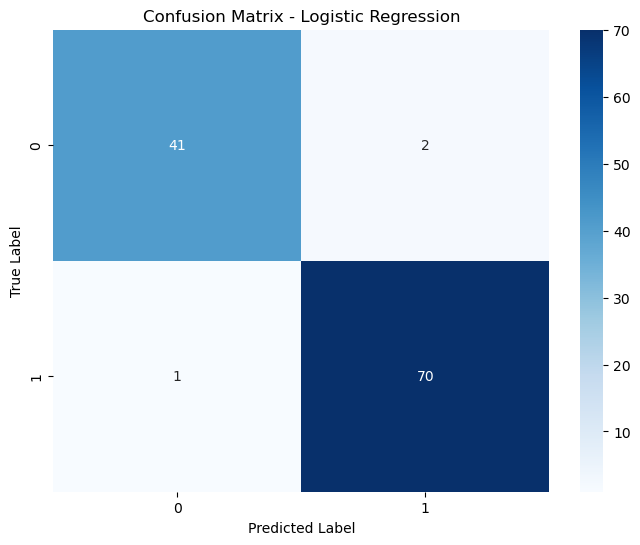

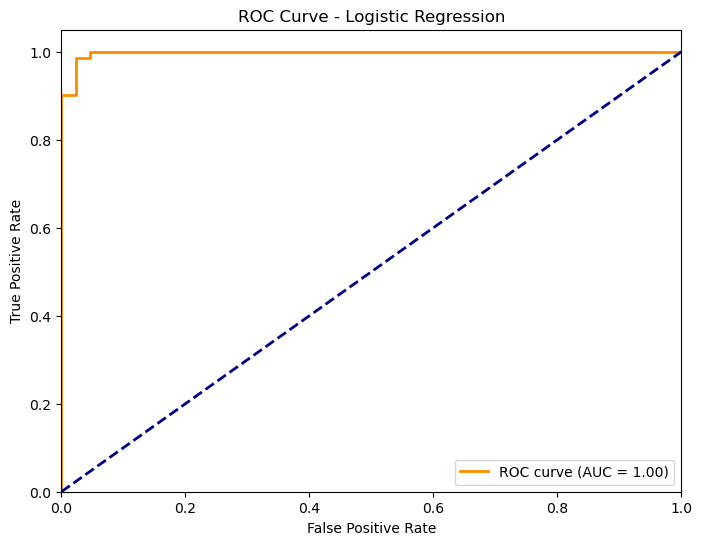


SVM Performance:
--------------------------------------------------
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



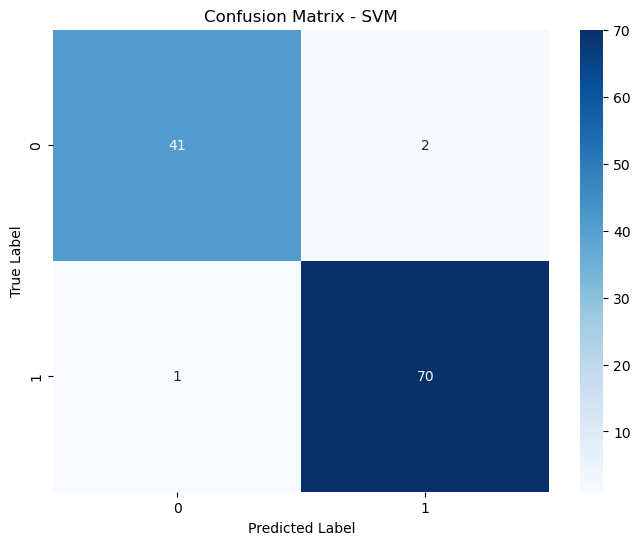

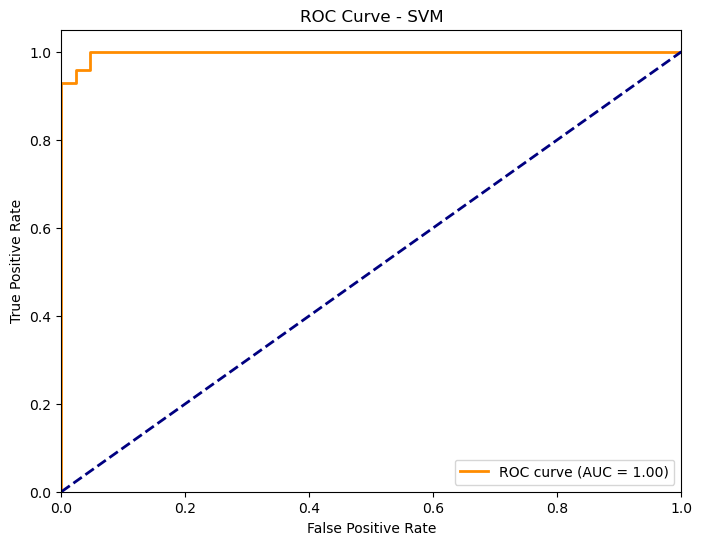


Decision Tree Performance:
--------------------------------------------------
Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



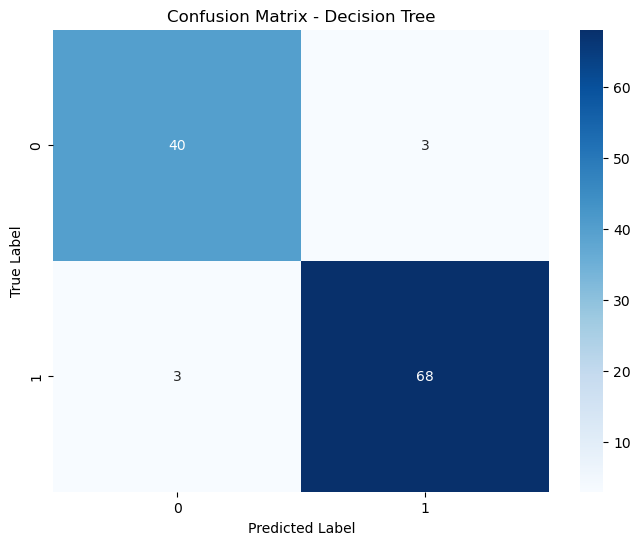

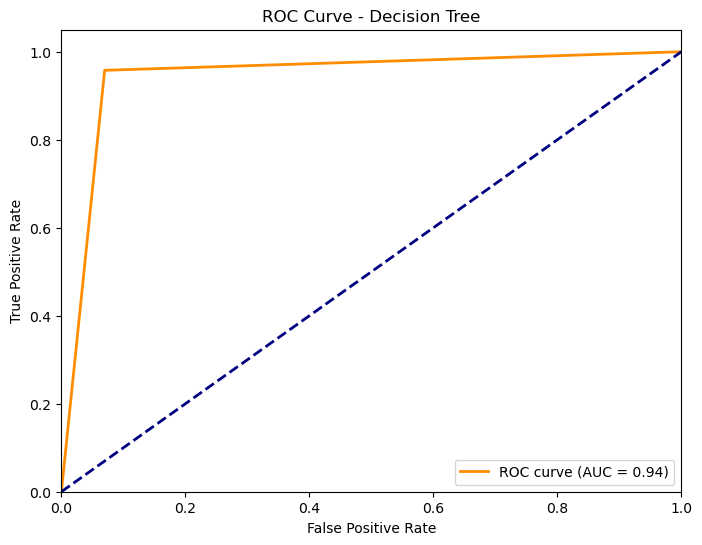


Random Forest Performance:
--------------------------------------------------
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



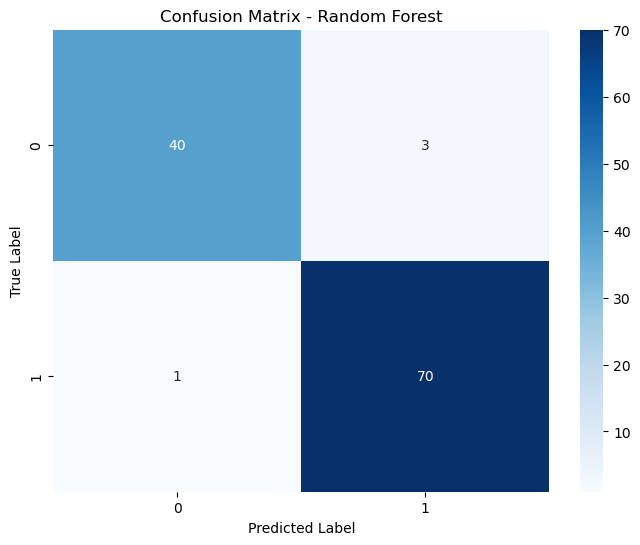

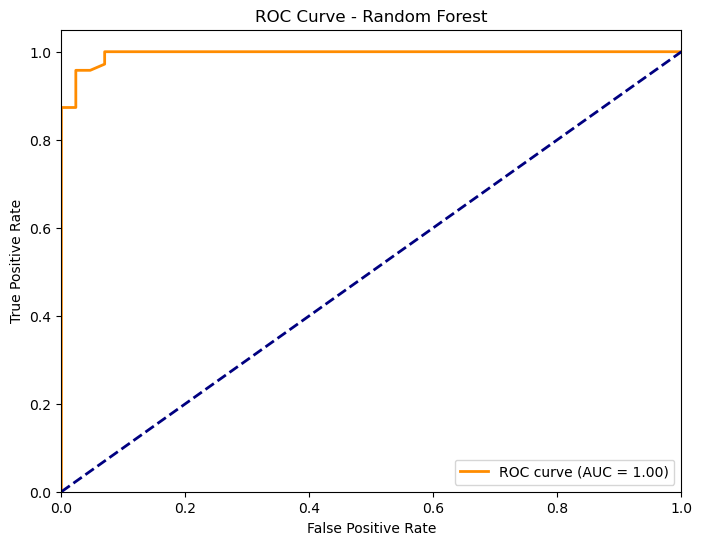

In [79]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    trained_model, accuracy, roc_auc = train_and_evaluate_model(
        model, X_train, X_test, y_train, y_test, name
    )
    results[name] = {
        'model': trained_model,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    }

## Model Comparison

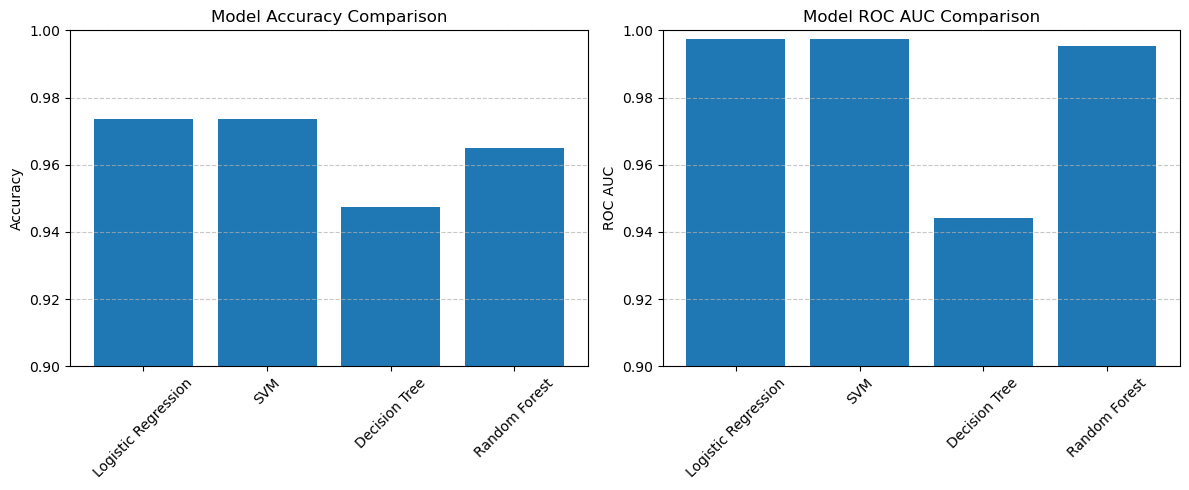


Model Performance Comparison:
--------------------------------------------------
Logistic Regression:
  Accuracy: 0.9737
  ROC AUC: 0.9974

SVM:
  Accuracy: 0.9737
  ROC AUC: 0.9974

Decision Tree:
  Accuracy: 0.9474
  ROC AUC: 0.9440

Random Forest:
  Accuracy: 0.9649
  ROC AUC: 0.9953



In [80]:
# Compare model accuracies
accuracies = {name: result['accuracy'] for name, result in results.items()}
roc_aucs = {name: result['roc_auc'] for name, result in results.items()}

# Plot accuracy comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(roc_aucs.keys(), roc_aucs.values())
plt.title('Model ROC AUC Comparison')
plt.ylabel('ROC AUC')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print comparison
print("\nModel Performance Comparison:")
print("-" * 50)
for name in results.keys():
    print(f"{name}:")
    print(f"  Accuracy: {accuracies[name]:.4f}")
    print(f"  ROC AUC: {roc_aucs[name]:.4f}\n")

## Feature Importance Analysis (for Random Forest)

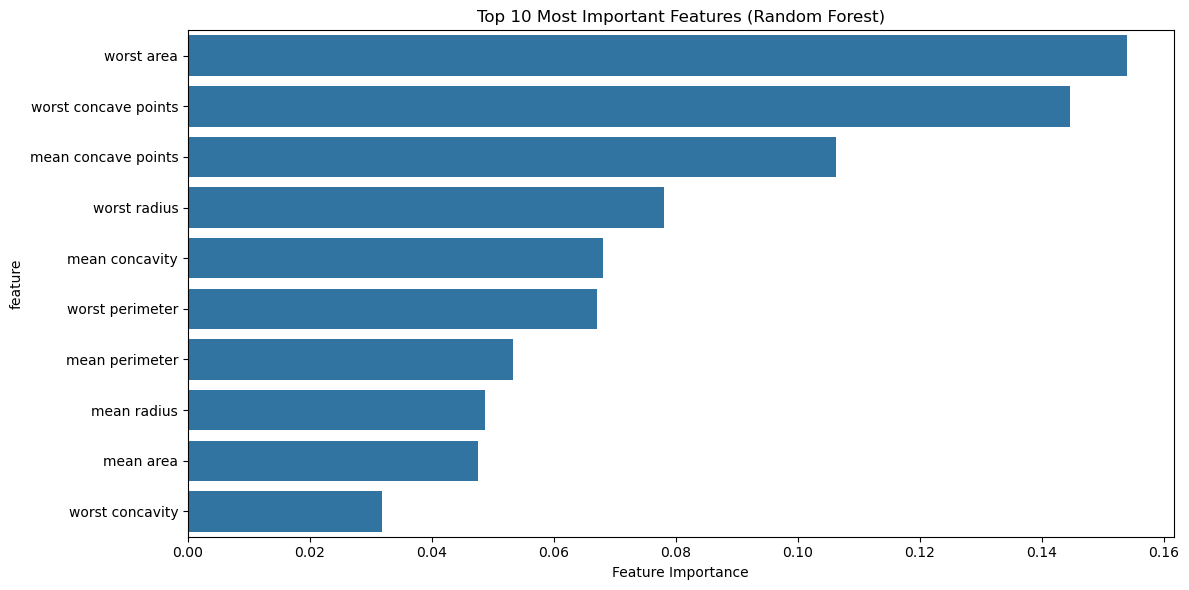

In [81]:
# Get feature importance from Random Forest model
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

## Save Best Model

Based on the performance metrics, we'll save the best performing model for use in the web application.

In [ ]:
# Determine best model based on accuracy and ROC AUC
best_model_name = max(results.keys(), key=lambda x: (results[x]['accuracy'] + results[x]['roc_auc'])/2)
best_model = results[best_model_name]['model']

print(f"Best performing model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"ROC AUC: {results[best_model_name]['roc_auc']:.4f}")



# Create models directory if it doesn't exist
os.makedirs('./web_app/models', exist_ok=True)

# Save the best model and scaler
joblib.dump(best_model, './web_app/models/best_model.joblib')
joblib.dump(scaler, './web_app/models/scaler.joblib')

print("\nModel and scaler saved successfully!")

Best performing model: Logistic Regression
Accuracy: 0.9737
ROC AUC: 0.9974


FileNotFoundError: [Errno 2] No such file or directory: '../web_app/models/best_model.joblib'